In [1]:
# Installing required directories

!pip install opendatasets

import os
import random
import cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import opendatasets as od
import pandas
from collections import Counter

# Path Mounting

In [2]:
od.download("https://www.kaggle.com/datasets/vishweshsalodkar/wild-animals")
data_path = 'E:/Animals'

Skipping, found downloaded files in ".\wild-animals" (use force=True to force download)


# List categories

In [3]:
categories = os.listdir(data_path)
print(categories)

['Cheetah', 'Jaguar', 'Leopard', 'Lion', 'Tiger']


# Image Preprocessing

In [4]:
train_data = []
for c in categories:
  path = os.path.join(data_path, c)
  print(path)
  class_index = categories.index(c)
  for img in os.listdir(path):
    try:
      img_arr = cv2.imread(os.path.join(path, img))
      img_arr = cv2.cvtColor(img_arr, cv2.COLOR_BGR2GRAY)
      img_arr = cv2.resize(img_arr, (256,256))
      print(type(img_arr), img_arr.shape)
      # plt.imshow(img_arr, cmap = 'gray')
      # break
      train_data.append([img_arr, class_index])
    except Exception as e:
      pass
    print(len(train_data))


E:/Animals\Cheetah
<class 'numpy.ndarray'> (256, 256)
1
<class 'numpy.ndarray'> (256, 256)
2
<class 'numpy.ndarray'> (256, 256)
3
<class 'numpy.ndarray'> (256, 256)
4
<class 'numpy.ndarray'> (256, 256)
5
<class 'numpy.ndarray'> (256, 256)
6
<class 'numpy.ndarray'> (256, 256)
7
<class 'numpy.ndarray'> (256, 256)
8
<class 'numpy.ndarray'> (256, 256)
9
<class 'numpy.ndarray'> (256, 256)
10
<class 'numpy.ndarray'> (256, 256)
11
<class 'numpy.ndarray'> (256, 256)
12
<class 'numpy.ndarray'> (256, 256)
13
<class 'numpy.ndarray'> (256, 256)
14
<class 'numpy.ndarray'> (256, 256)
15
<class 'numpy.ndarray'> (256, 256)
16
<class 'numpy.ndarray'> (256, 256)
17
<class 'numpy.ndarray'> (256, 256)
18
<class 'numpy.ndarray'> (256, 256)
19
<class 'numpy.ndarray'> (256, 256)
20
<class 'numpy.ndarray'> (256, 256)
21
<class 'numpy.ndarray'> (256, 256)
22
<class 'numpy.ndarray'> (256, 256)
23
<class 'numpy.ndarray'> (256, 256)
24
<class 'numpy.ndarray'> (256, 256)
25
<class 'numpy.ndarray'> (256, 256)
26
<c

In [5]:
random.shuffle(train_data)
for i in range(10):
  print(train_data[i])

[array([[204, 202, 202, ..., 125, 134, 165],
       [205, 209, 203, ..., 112, 132, 155],
       [202, 212, 199, ..., 127, 144, 156],
       ...,
       [146, 184, 160, ..., 171, 151,  91],
       [167, 196, 159, ..., 164, 176, 155],
       [172, 201, 159, ..., 178, 161, 133]], dtype=uint8), 3]
[array([[20, 21, 16, ..., 12,  9, 10],
       [22, 22, 16, ..., 13,  8,  8],
       [23, 23, 15, ...,  9, 10, 10],
       ...,
       [ 3,  5, 10, ...,  6,  5,  0],
       [ 7,  5,  5, ..., 20,  1,  1],
       [ 4,  8, 14, ..., 27, 15, 11]], dtype=uint8), 4]
[array([[21, 22, 22, ..., 21, 22, 22],
       [22, 22, 23, ..., 21, 22, 22],
       [23, 23, 24, ..., 22, 22, 22],
       ...,
       [33, 33, 40, ..., 59, 56, 56],
       [32, 34, 38, ..., 61, 56, 56],
       [30, 34, 37, ..., 62, 56, 56]], dtype=uint8), 0]
[array([[166, 169, 174, ...,  62,  56,  54],
       [171, 172, 175, ...,  58,  56,  54],
       [177, 177, 177, ...,  57,  55,  53],
       ...,
       [151, 150, 138, ..., 148, 153, 151]

# Leveling The Images

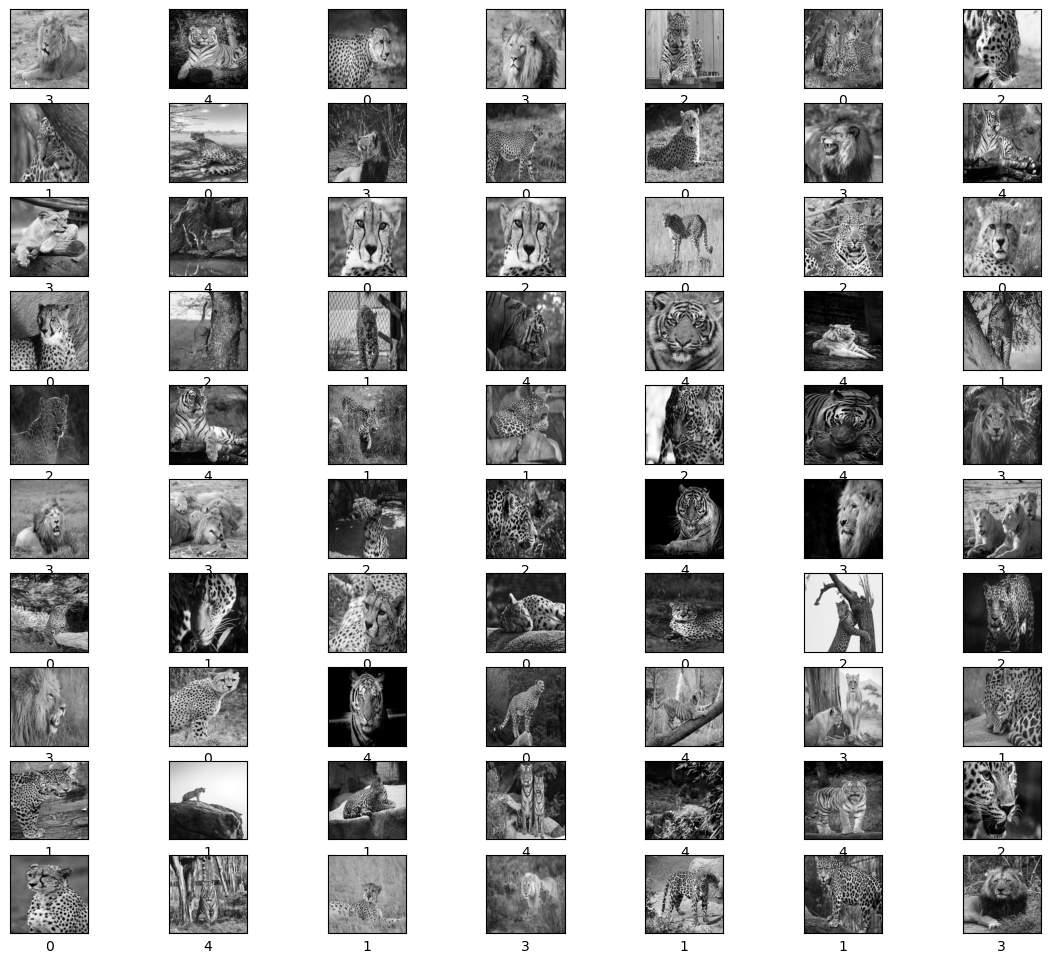

In [6]:
plt.figure(figsize=(14, 12))  # Set the overall figure size

i = 0  
for r in range(10): 
    for c in range(7):  
        plt.subplot(10, 7, i + 1)  
        plt.imshow(train_data[i][0], cmap='gray')  # Display the image in grayscale
        plt.xticks([])  
        plt.yticks([])  
        plt.xlabel(train_data[i][1])  
        i += 1  

plt.show()  # Display the entire grid


# Training

136 34
(34, 256, 256) (34,)


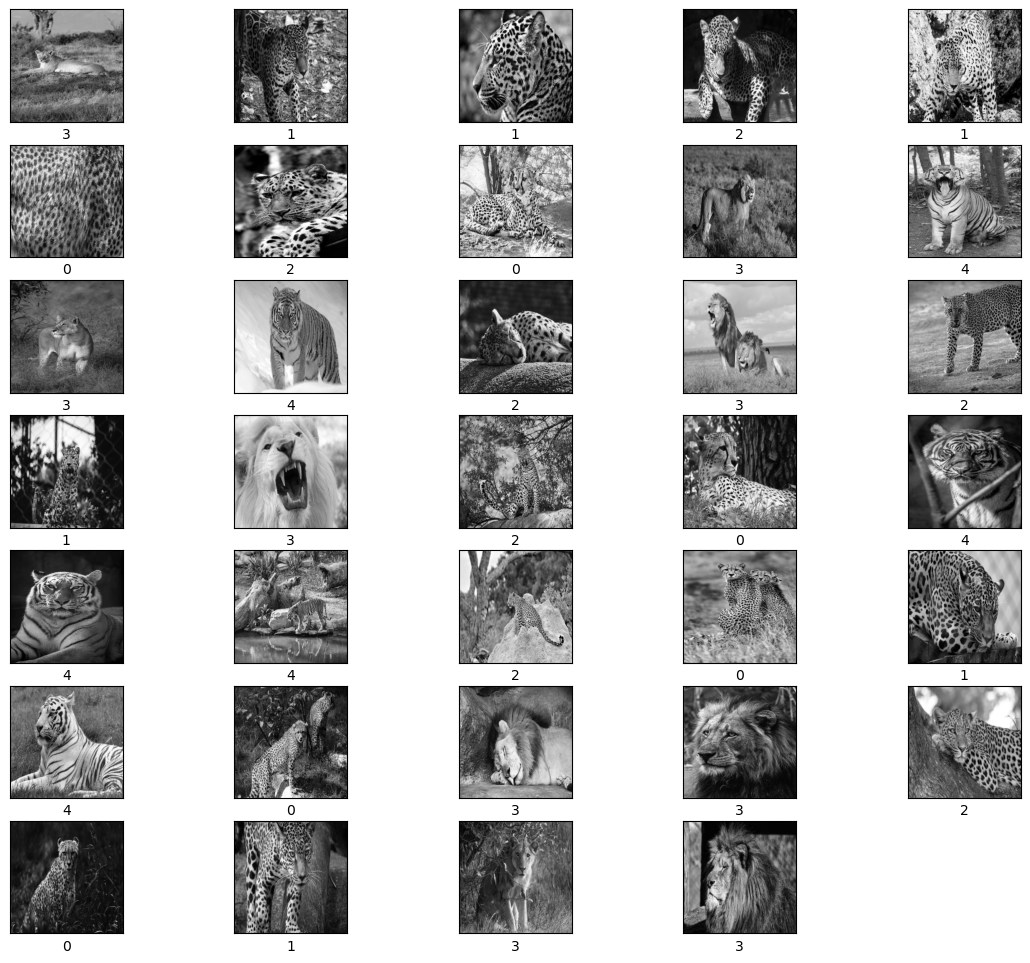

In [7]:
f1 = train_data[0:34]
f2 = train_data[34:68]
f3 = train_data[68:102]
f4 = train_data[102:136]
f5 = train_data[136:170]
train = f1+f2+f3+f4
valid = f5
print(len(train), len(valid))

valid_img = np.array([i[0] for i in valid])
valid_label = np.array([i[1] for i in valid])

print(valid_img.shape, valid_label.shape)

plt.figure(figsize = (14,12))
i=0
for r in range(valid_img.shape[0]):
  plt.subplot(7,5,i+1)
  plt.imshow(valid_img[i], cmap = 'gray')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(valid_label[r])
  i+=1
plt.show()

# 5-folds cross validation for KNN

In [8]:
X = np.array([i[0] for i in train_data])  # Extract images (features)
y = np.array([i[1] for i in train_data])  # Extract labels

# Split the data into 5 equal folds for cross-validation
folds = [train_data[i:i + 34] for i in range(0, 170, 34)]
print("Fold sizes:", [len(f) for f in folds]) 


class KNearestNeighbor:
    def __init__(self, k=1):
        self.k = k 

    def train(self, X, y):
        self.Xtr = X 
        self.ytr = y  

    def predict(self, X):
        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)  # Initialize predictions

        for i in range(num_test):  # For each test sample
            distances = np.sqrt(np.sum((self.Xtr - X[i, :])**2, axis=(1, 2)))  # Compute Euclidean distance
            nearest_indices = np.argsort(distances)[:self.k]  # Get indices of k-nearest neighbors
            nearest_labels = self.ytr[nearest_indices]  # Retrieve their labels
            unique_labels, counts = np.unique(nearest_labels, return_counts=True)  # Count label occurrences
            Ypred[i] = unique_labels[np.argmax(counts)]  # Assign label with highest count

        return Ypred


fold_acc = []
yPred = []

# Function for 5-fold cross-validation
def cross_validate_knn(train_data, k_values):
    avg_accuracies = []

    for k in k_values:  # Loop through all k values
        fold_accuracies = []

        for i in range(5):  # Perform cross-validation
            valid = folds[i]  # Current fold as validation set
            train = [item for j, fold in enumerate(folds) if j != i for item in fold]  # Remaining as training set

            # Split train/validation data into features and labels
            train_img = np.array([r[0] for r in train])
            train_label = np.array([r[1] for r in train])
            valid_img = np.array([r[0] for r in valid])
            valid_label = np.array([r[1] for r in valid])

            knn = KNearestNeighbor(k=k)
            knn.train(train_img, train_label)  # Train on the training data
            y_pred = knn.predict(valid_img)  # Predict on validation data
            yPred.append(y_pred)

            # Calculate and store accuracy
            correct = np.sum(valid_label == y_pred)
            accuracy = correct / valid_label.shape[0]
            fold_accuracies.append(accuracy)

        avg_accuracies.append(np.mean(fold_accuracies))  # Store average accuracy for this k
        print(f"k = {k}, fold accuracies: {list(np.round(fold_accuracies, 2))}, average accuracy: {np.round(np.mean(fold_accuracies), 2)}")
        fold_acc.append(fold_accuracies)

    return avg_accuracies


# Run cross-validation for k values from 1 to 30
k_values = list(range(1, 31))
avg_accuracies = cross_validate_knn(train_data, k_values)


Fold sizes: [34, 34, 34, 34, 34]
k = 1, fold accuracies: [0.35, 0.32, 0.32, 0.38, 0.21], average accuracy: 0.32
k = 2, fold accuracies: [0.21, 0.29, 0.29, 0.26, 0.15], average accuracy: 0.24
k = 3, fold accuracies: [0.18, 0.26, 0.26, 0.29, 0.24], average accuracy: 0.25
k = 4, fold accuracies: [0.32, 0.26, 0.41, 0.35, 0.21], average accuracy: 0.31
k = 5, fold accuracies: [0.32, 0.29, 0.44, 0.35, 0.18], average accuracy: 0.32
k = 6, fold accuracies: [0.35, 0.26, 0.38, 0.32, 0.21], average accuracy: 0.31
k = 7, fold accuracies: [0.32, 0.26, 0.38, 0.29, 0.18], average accuracy: 0.29
k = 8, fold accuracies: [0.24, 0.29, 0.41, 0.29, 0.18], average accuracy: 0.28
k = 9, fold accuracies: [0.24, 0.26, 0.29, 0.29, 0.18], average accuracy: 0.25
k = 10, fold accuracies: [0.24, 0.32, 0.24, 0.29, 0.24], average accuracy: 0.26
k = 11, fold accuracies: [0.21, 0.35, 0.21, 0.32, 0.21], average accuracy: 0.26
k = 12, fold accuracies: [0.24, 0.32, 0.24, 0.32, 0.26], average accuracy: 0.28
k = 13, fold acc

# Predictions

In [9]:
yPred = np.array(yPred)
print(yPred)
print(yPred.shape)

[[2 4 4 ... 1 0 4]
 [1 4 2 ... 0 3 4]
 [2 3 2 ... 0 1 1]
 ...
 [0 0 1 ... 0 3 3]
 [0 0 0 ... 4 4 2]
 [0 0 0 ... 2 4 4]]
(150, 34)


In [10]:
fold_acc = np.array(fold_acc)
# print(fold_acc)
print(fold_acc.shape)

(30, 5)


# Plotting acccuracies

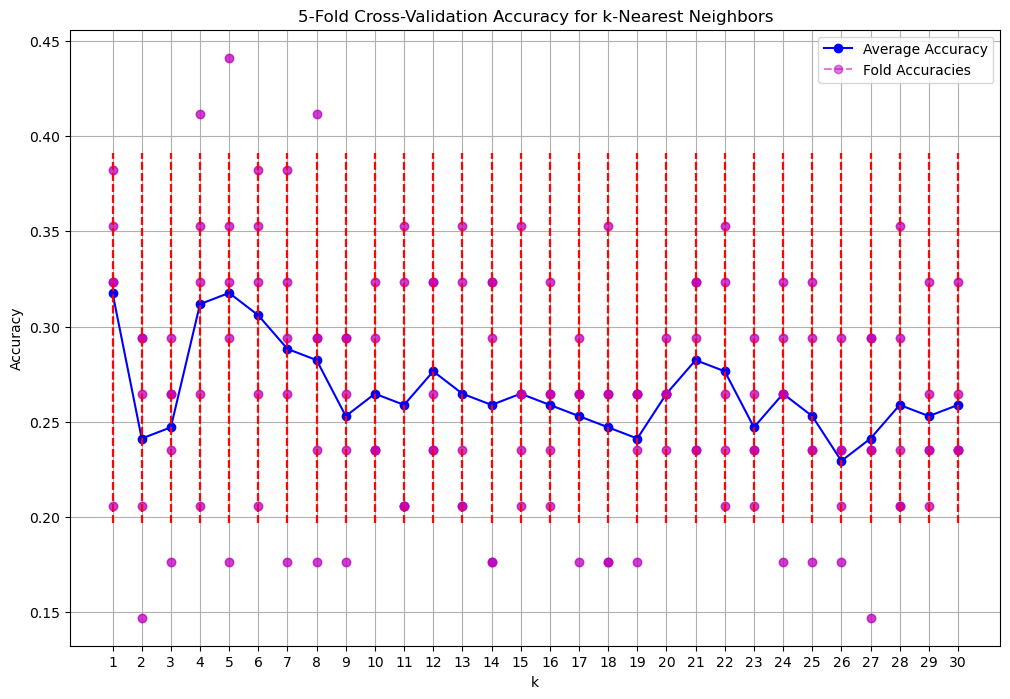

In [13]:
plt.figure(figsize=(12, 8))

# Plot the average accuracy for each k
plt.plot(k_values, avg_accuracies, marker='o', linestyle='-', color='b', label="Average Accuracy")

# Plot each fold's accuracy as a red vertical line for each k
for i, k in enumerate(k_values):
    # fold_acc[i] contains accuracies for each fold at this k
    for acc in fold_acc[i]:
        plt.plot([k, k], [min(1000,acc), acc], marker='o', color='m', linestyle='--', alpha=0.5)  # Draw a vertical line segment for each fold
        plt.axvline(x=k, ymin=0.2, ymax=0.8, color='r', linestyle='--', alpha=0.5)  # Draw a vertical line for each k

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("5-Fold Cross-Validation Accuracy for k-Nearest Neighbors")
plt.xticks(k_values)
plt.legend(["Average Accuracy", "Fold Accuracies"], loc="best")
plt.grid()
plt.show()